## Visualization Demonstration

### Set up environment
Call in libraries we will use this semester

In [2]:
from datascience import *

%matplotlib inline

#### Create table using survey dataset from GitHub

In [3]:
survey = Table.read_table('Survey_F24.csv')
survey.show(3)

Gender,Random digits,Eye color,Height,Cash value,Keys,Credit cards,Pulse rate,Exercise,Units taking,Employed,Children,Smoke,Handed,Shoe length,Arrival,Birth month,Navel height,Age,Pineapple,Car,People dated,Religious,Pets,# pets,Apple or Android,Math bad,Outside US,Outside CA,Swim,Cook,Pant leg,Sleep position,Hours of sleep,Piercings,Number of textees,Extroversion
male,5959,brown,68,1000,2,1,90,yes,10,no,0,no,right,nan,45,4,nan,20,no,yes,1,no,yes,2,Android,no,yes,yes,yes,no,Left leg in first,Left side,8,0,5,5
male,1234,brown,66,4000,3,2,88,no,14,yes,0,no,right,nan,30,4,nan,20,yes,yes,2,no,yes,2,Apple,yes,yes,yes,yes,yes,Left leg in first,Left side,7,0,3,2
male,7854,brown,71,25,0,0,64,yes,13,yes,0,no,right,nan,15,8,nan,18,yes,no,0,yes,no,0,Android,no,yes,yes,yes,yes,Right leg in first,Back,8,0,4,3


In [4]:
survey.labels

('Gender',
 'Random digits',
 'Eye color',
 'Height',
 'Cash value',
 'Keys',
 'Credit cards',
 'Pulse rate',
 'Exercise',
 'Units taking',
 'Employed',
 'Children',
 'Smoke',
 'Handed',
 'Shoe length',
 'Arrival',
 'Birth month',
 'Navel height',
 'Age',
 'Pineapple',
 'Car',
 'People dated',
 'Religious',
 'Pets',
 '# pets',
 'Apple or Android',
 'Math bad',
 'Outside US',
 'Outside CA',
 'Swim',
 'Cook',
 'Pant leg',
 'Sleep position',
 'Hours of sleep',
 'Piercings',
 'Number of textees',
 'Extroversion')

## Exploring the data

In [5]:
#categorical variable
gender_dist = survey.group('Gender')
gender_dist

Gender,count
female,8
male,26
male,1


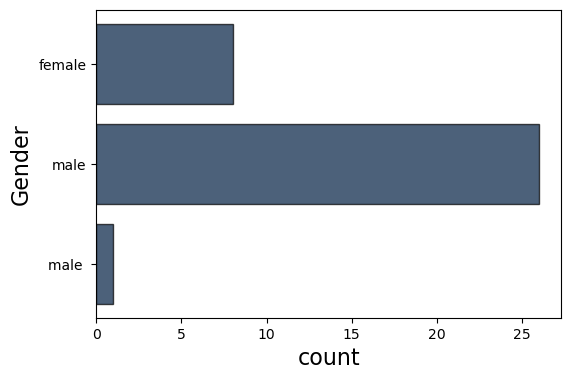

In [6]:
gender_dist.barh('Gender')
# studio_distribution.barh('Studio')

### Fix input errors/discrepancies

In [7]:
#Use are.equal_to to replace 'male ' with 'male' in the Gender column

male_count = gender_dist.where('Gender', are.equal_to('male')).column('count').sum() + \
             gender_dist.where('Gender', are.equal_to('male ')).column('count').sum()

female_count = gender_dist.where('Gender', are.equal_to('female')).column('count').sum()

gender_dist_clean = Table().with_columns(
    'Gender', ['male', 'female'],
    'count', [male_count, female_count]
)
gender_dist_clean

Gender,count
male,27
female,8


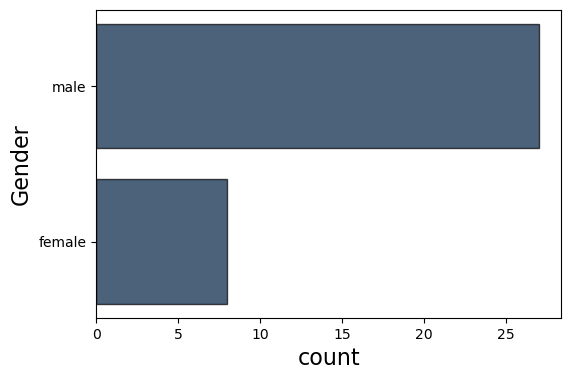

In [8]:
gender_dist_clean.barh('Gender')

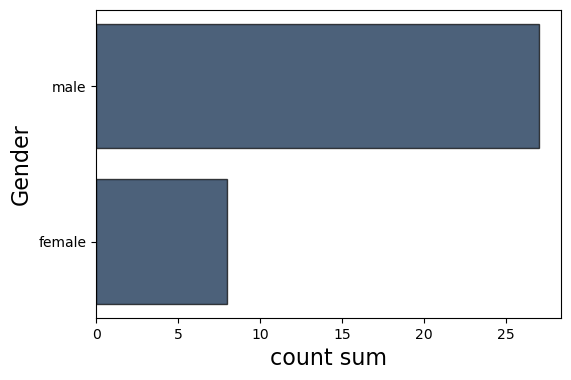

In [9]:
# More advanced replace 
# Define a function to replace 'male ' with 'male'

def clean_gender(gender):
    return gender.replace(' ', '')

# Clean the 'Gender' column
gender_dist_cleaned = gender_dist.with_column('Gender', gender_dist.apply(clean_gender, 'Gender'))

# Group by Gender and sum the counts
gender_dist_cleaned = gender_dist_cleaned.group('Gender', sum)

# Sort the table by count in descending order
gender_dist_cleaned = gender_dist_cleaned.sort('count sum', descending=True)

# Create the horizontal bar plot
gender_dist_cleaned.barh('Gender')

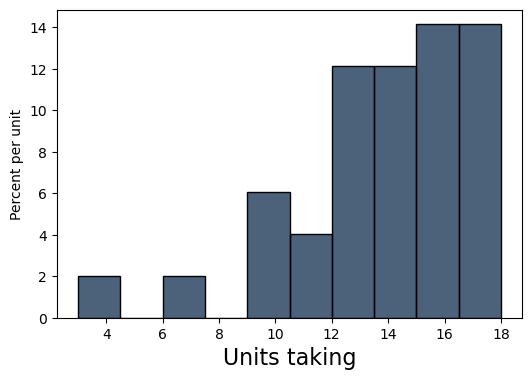

In [10]:
#numerical data
survey.hist('Units taking')

In [11]:
eye_color = survey.group('Eye color')
eye_color

Eye color,count
black,2
blue,2
brown,28
green,1
hazel,2


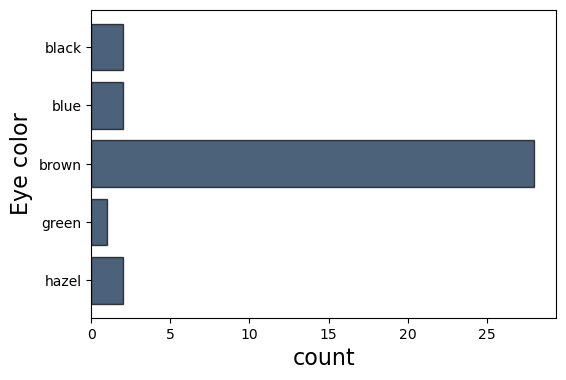

In [12]:
eye_color.barh('Eye color')

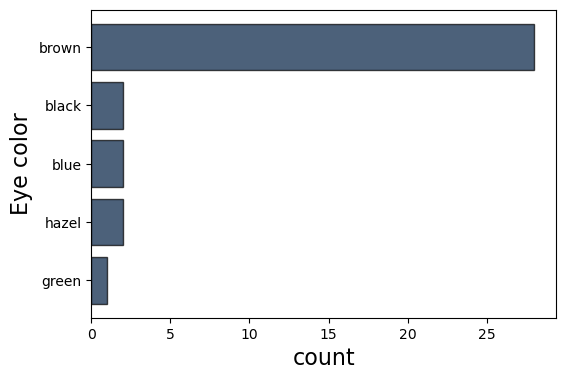

In [13]:
eye_color.sort('count', descending = True).barh('Eye color')

In [14]:
handed = survey.group(['Handed', 'Pant leg'])
handed

Handed,Pant leg,count
ambidextrous,Left leg in first,1
left,Left leg in first,5
left,Right leg in first,3
right,I don't know,2
right,Left leg in first,10
right,Right leg in first,14


In [18]:
l_handed= handed.where('Handed', are.equal_to('left'))
r_handed = handed.where('Handed', are.equal_to('right'))
l_handed, r_handed

(Handed | Pant leg           | count
 left   | Left leg in first  | 5
 left   | Right leg in first | 3,
 Handed | Pant leg           | count
 right  | I don't know       | 2
 right  | Left leg in first  | 10
 right  | Right leg in first | 14)